#Placements_Prediction_Machine_Learning_Model

##Data Analysis & Cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
'''from google.colab import drive
drive.mount('/drive')'''

"from google.colab import drive\ndrive.mount('/drive')"

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/ML/ML3/Dataset/Placement_Data.csv')

In [ ]:
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
df.shape

(215, 15)

In [ ]:
df.shape[1]

15

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df['ssc_p'].mean()

67.30339534883721

In [ ]:
df['ssc_p'].max()

89.4

In [ ]:
df[['ssc_b','ssc_p']].groupby(by='ssc_b', sort= False).mean()

,ssc_p
ssc_b,
Others,68.662020
Central,66.143879


In [ ]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

145    Placed
Name: status, dtype: object

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df['status']=='Placed'

0       True
1       True
2       True
3      False
4       True
       ...  
210     True
211     True
212     True
213     True
214    False
Name: status, Length: 215, dtype: bool

In [ ]:
df[df['status']=='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

In [ ]:
df['degree_t'].nunique()

3

In [ ]:
df[['ssc_p', 'hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


In [ ]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


Remove unnessasery column

In [ ]:
df.drop(columns= ['sl_no'], inplace= False)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.drop(columns= ['sl_no'], inplace= True)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

###Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(0.5, 1.0, 'Scatter plot bw 10th and 12th')

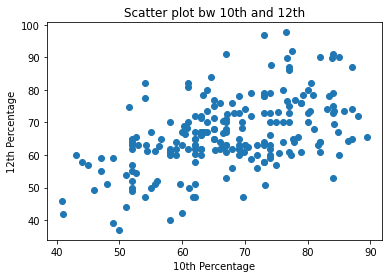

In [ ]:
plt.scatter(df['ssc_p'], df['hsc_p'])
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.title('Scatter plot bw 10th and 12th')

In [ ]:
colours= {'Placed' : 'tab:green', 'Not Placed': 'tab:red'}

In [ ]:
df.status.map(colours)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot bw 10th and 12th')

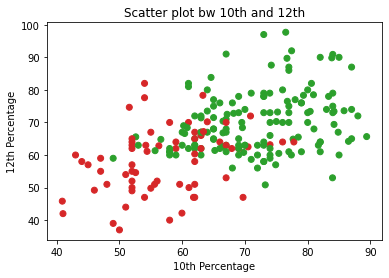

In [ ]:
plt.scatter(df['ssc_p'], df['hsc_p'], c= df['status'].map(colours))
plt.xlabel('10th Percentage')
plt.ylabel('12th Percentage')
plt.title('Scatter plot bw 10th and 12th')

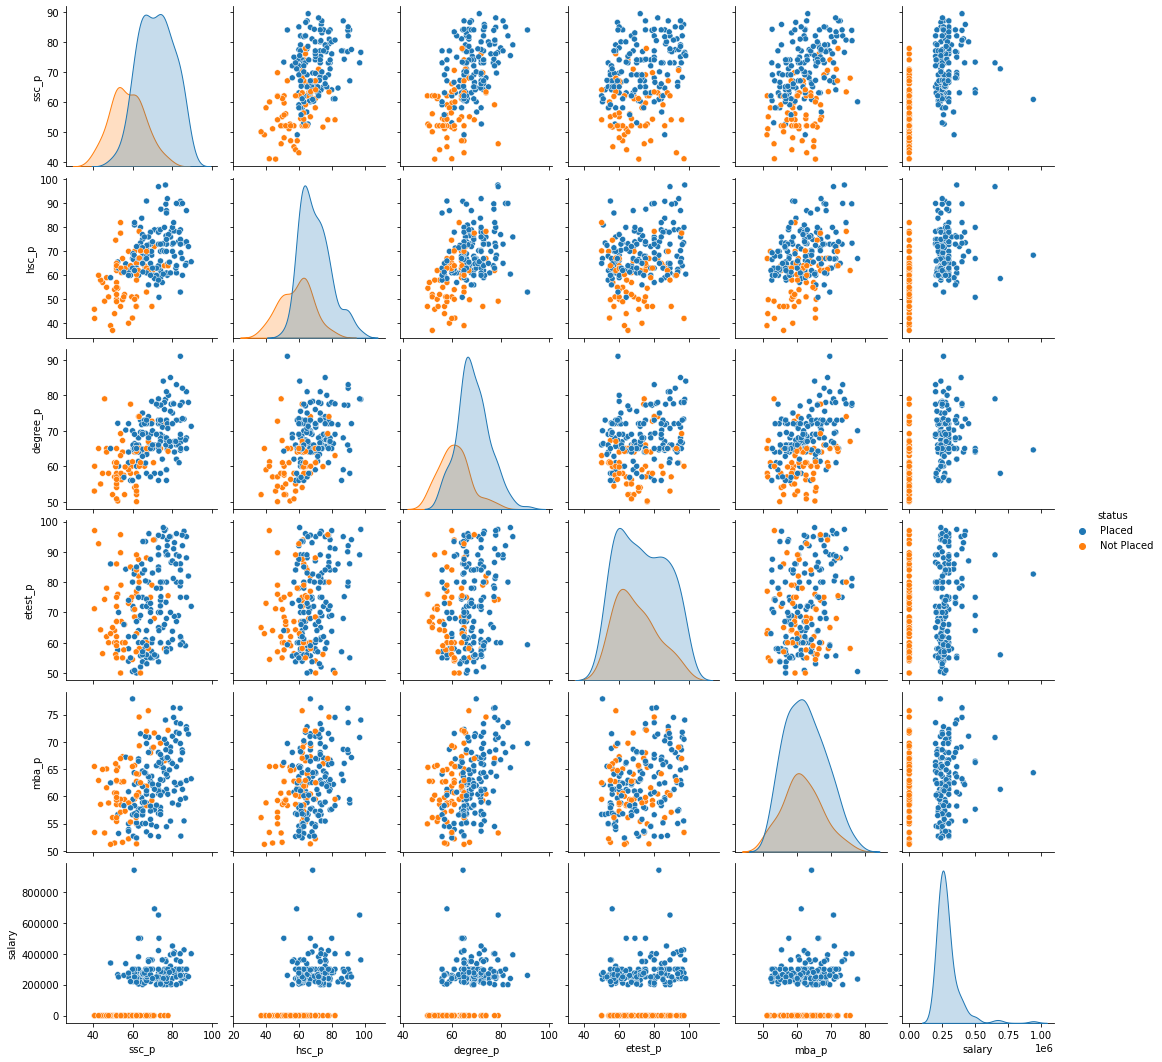

In [ ]:
sb.pairplot(df, hue= 'status')

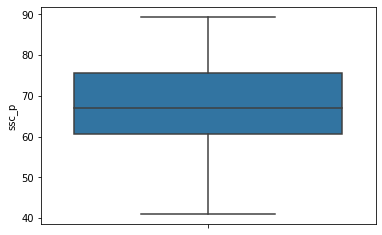

In [ ]:
sb.boxplot(y= 'ssc_p', data=df)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


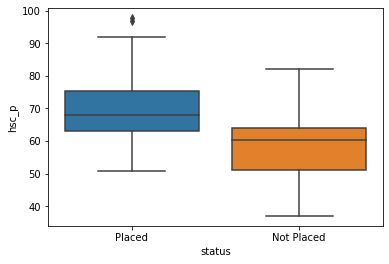

In [ ]:
sb.boxplot(y='hsc_p', data= df, x='status')

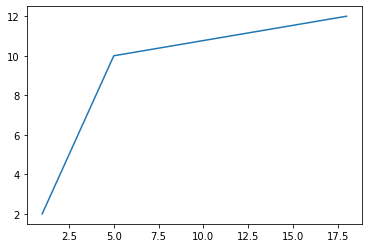

In [ ]:
 a=[1,2,3,4,5,18]
 b=[2,4,6,8,10,12]
 plt.plot(a, b)

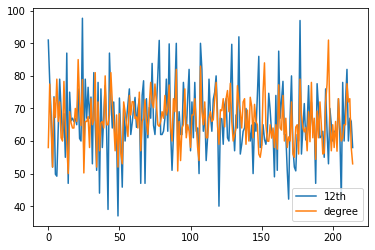

In [ ]:
plt.plot(df['hsc_p'], label='12th')
plt.plot(df['degree_p'], label='degree')
plt.legend()

In [ ]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


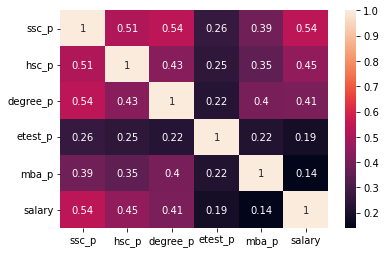

In [ ]:
sb.heatmap(df.corr(), annot=True)

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <a list of 10 Patch objects>)

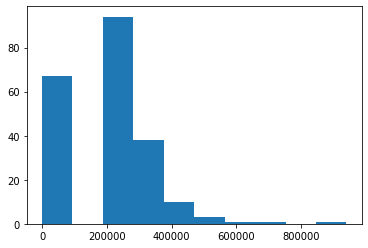

In [ ]:
plt.hist(df['salary'])

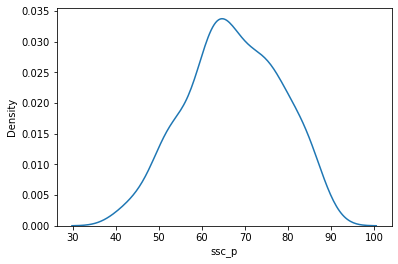

In [ ]:
sb.kdeplot(df['ssc_p'])

###Outlier Analysis

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


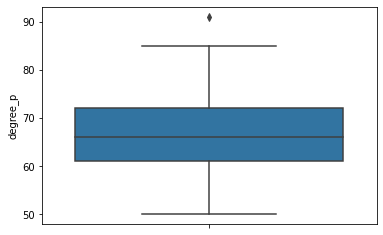

In [ ]:
sb.boxplot(y='degree_p', data=df)

In [ ]:
 perct25= df['degree_p'].quantile(0.25)
 perct25

61.0

In [ ]:
perct75= df['degree_p'].quantile(0.75)
perct75

72.0

In [ ]:
iqr=perct75-perct25
iqr

11.0

In [ ]:
uplimit=perct75+1.5*iqr
llimit=perct25-1.5*iqr

In [ ]:
uplimit

88.5

In [ ]:
llimit

44.5

In [ ]:
df[(df['degree_p']<uplimit) & (df['degree_p']>llimit)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df[df['degree_p']<uplimit]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df=df[(df['degree_p']<uplimit) & (df['degree_p']>llimit)]

In [ ]:
df.shape

(214, 14)

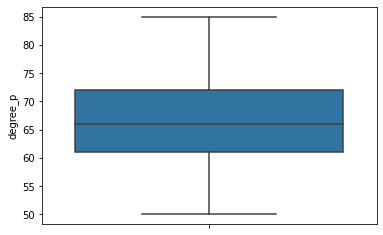

In [ ]:
sb.boxplot(y='degree_p', data=df)

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']

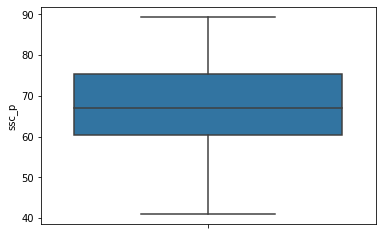

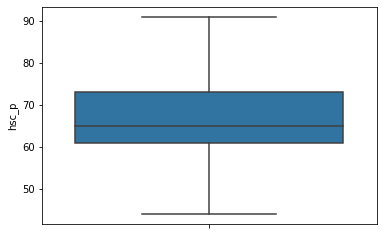

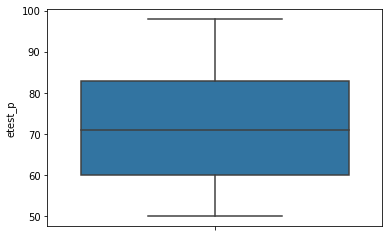

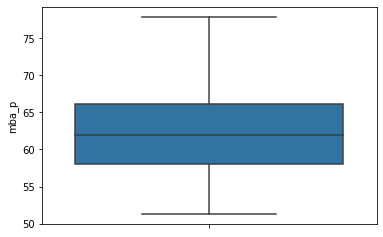

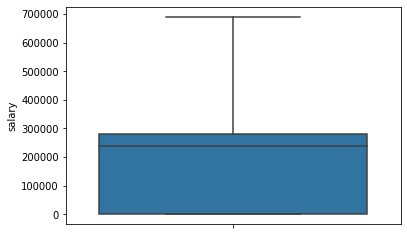

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
  perct25= df[c].quantile(0.25)
  perct75= df[c].quantile(0.75)
  iqr=perct75-perct25
  uplimit=perct75+(1.5*iqr)
  llimit=perct25-(1.5*iqr)
  df=df[(df[c]<uplimit) & (df[c ]>llimit)]
  plt.figure()
  sb.boxplot(y=c, data=df)

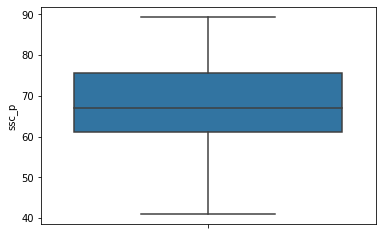

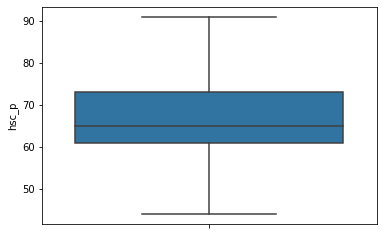

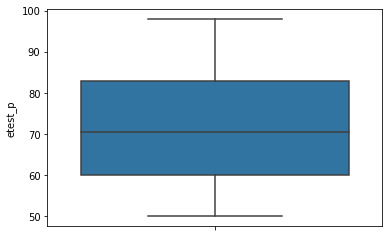

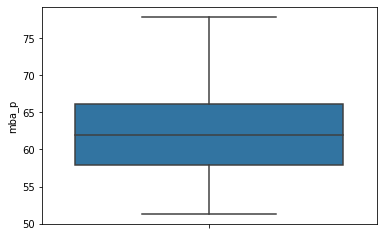

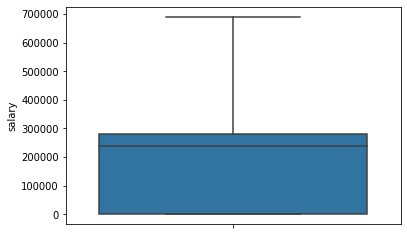

In [ ]:
for c in col:
  plt.figure()
  sb.boxplot(y=c, data=df)

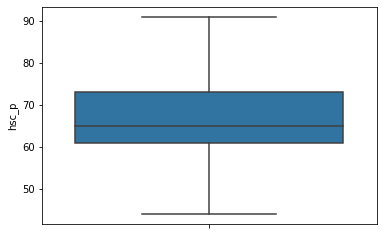

In [ ]:
sb.boxplot(y='hsc_p', data = df)

###Lebel Encoding

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['ssc_b']

1      Central
2      Central
3      Central
4      Central
5       Others
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 204, dtype: object

In [ ]:
df['ssc_b'].value_counts()

Central    112
Others      92
Name: ssc_b, dtype: int64

In [ ]:
Le= LabelEncoder()

In [ ]:
df['ssc_b']=Le.fit_transform(df['ssc_b'])

In [ ]:
 df['ssc_b']

1      0
2      0
3      0
4      0
5      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: ssc_b, Length: 204, dtype: int64

In [ ]:
df['ssc_b'].value_counts()

0    112
1     92
Name: ssc_b, dtype: int64

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
col1=['gender', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [ ]:
for c1 in col1:
  df[c1]= Le.fit_transform(df[c1])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


##Linear Regression Model


Extract Indeprndent and Dependent Variables

In [ ]:
X= df.iloc[:, 0:-1]

In [ ]:
Y= df.iloc[:, -1]

In [ ]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [ ]:
Y

1      200000.0
2      250000.0
3           0.0
4      425000.0
5           0.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 204, dtype: float64

In [ ]:
X= df.iloc[:, 0:-1].values

In [ ]:
Y= df.iloc[:, -1].values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       [ 1.  , 56.  ,  0.  , ...,  1.  , 59.43,  0.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

In [ ]:
Y

array([200000., 250000.,      0., 425000.,      0.,      0., 252000.,
       231000.,      0., 260000., 250000.,      0., 218000.,      0.,
       200000., 300000.,      0.,      0., 236000., 265000., 393000.,
       360000., 300000.,      0., 240000., 265000., 350000.,      0.,
       250000.,      0., 278000., 260000.,      0., 300000.,      0.,
       320000., 240000., 411000., 287000.,      0., 300000., 200000.,
            0.,      0., 204000., 250000., 200000.,      0.,      0.,
       450000., 216000., 220000., 240000., 360000., 268000., 265000.,
       260000., 300000., 240000.,      0., 240000.,      0., 275000.,
       275000.,      0., 275000., 360000., 240000., 240000., 218000.,
       336000.,      0., 230000., 500000., 270000.,      0., 240000.,
       300000.,      0., 300000., 300000., 400000., 220000.,      0.,
       210000., 210000., 300000.,      0., 230000.,      0., 260000.,
       420000., 300000.,      0., 220000.,      0.,      0., 380000.,
       300000., 2400

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train

array([[ 0.  , 59.  ,  0.  , ...,  1.  , 57.9 ,  1.  ],
       [ 1.  , 58.  ,  0.  , ...,  0.  , 54.97,  1.  ],
       [ 0.  , 46.  ,  1.  , ...,  0.  , 53.29,  0.  ],
       ...,
       [ 0.  , 76.  ,  0.  , ...,  0.  , 64.44,  1.  ],
       [ 1.  , 61.8 ,  1.  , ...,  0.  , 56.13,  0.  ],
       [ 1.  , 61.08,  1.  , ...,  0.  , 65.69,  0.  ]])

Use Standarisation and Perform Linear Regresion

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_train= sc.fit_transform(X_train)

In [ ]:
X_test= sc.transform(X_test)

In [ ]:
X_test

array([[ 0.77055175, -0.4300407 , -0.93051258,  0.01964091, -1.17924764,
        -0.65724078, -0.02519687, -0.70564585,  1.39366699, -1.02063051,
        -0.94280904,  0.08786578,  0.68640647],
       [ 0.77055175, -0.89960456, -0.93051258, -0.5175302 , -1.17924764,
        -0.65724078, -0.79320398, -0.70564585,  1.39366699, -0.86007729,
         1.06066017, -0.19272524,  0.68640647],
       [-1.29777137, -0.33612793, -0.93051258,  0.10228262,  0.8479983 ,
         1.01872321,  0.52337964,  1.5204122 ,  1.39366699, -1.36822823,
         1.06066017,  1.57383596,  0.68640647],
       [ 0.77055175, -0.4300407 , -0.93051258,  0.10228262, -1.17924764,
        -0.65724078,  1.1268138 , -0.70564585, -0.71753152,  0.74545489,
        -0.94280904, -0.26079761, -1.45686272],
       [ 0.77055175,  1.35430197,  1.0746765 , -0.5175302 ,  0.8479983 ,
         1.01872321, -0.51891573,  1.5204122 , -0.71753152,  1.30739115,
        -0.94280904,  0.57101363,  0.68640647],
       [ 0.77055175, -0.430040

Perform Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg= LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
reg.intercept_

192908.49673202613

In [ ]:
reg.coef_

array([ 1.19185458e+04, -9.17978642e+01,  2.55906024e+03, -4.39471743e+03,
        3.20666426e+02, -3.82551167e+02, -8.26764540e+03,  1.39091467e+04,
       -1.32973517e+03,  3.94736221e+03, -8.57449511e+03,  1.35261438e+04,
        1.35088004e+05])

In [ ]:
Y_pred= reg.predict(X_test)

In [ ]:
Y_pred

array([286046.81656868, 274459.95751446, 289008.27973901,  -8308.09988102,
       346960.52762266, 294908.95432101, 272837.67454448, -38087.64059862,
       298847.64949117, -20063.25172711, 276520.74259101, 287221.15345601,
        25394.98979257,  -4429.24031502, 264426.54253315, -10886.50437157,
       318598.6533077 , 330361.41355697, 298849.83979122, 334323.56110628,
       -19726.42454325, 267308.83160162,  16726.25726084, 235787.32531033,
       255585.7478993 , -13162.4067428 , 261283.08925446, 262863.80034286,
       307958.04805604,  18098.07186881, 328329.1958842 , 304084.28727077,
       253275.94882381, 307524.6588806 , 249789.50396213, 259694.76564645,
       292637.4122021 , 306741.6999318 , 277769.77901419, 243967.82264974,
       287755.25752999, 310364.63817934,   7474.03035098, 252880.136309  ,
       285062.44857337, -22314.34147577, 274864.28786072, -13755.63727421,
       261272.76372862, 272616.56778493, 276397.24514783])

In [ ]:
Y_test

array([300000., 260000., 250000.,      0., 360000., 250000., 220000.,
            0., 295000.,      0., 218000., 290000.,      0.,      0.,
       260000.,      0., 236000., 300000., 265000., 340000.,      0.,
       380000.,      0., 278000., 250000.,      0., 276000., 300000.,
       260000.,      0., 275000., 240000., 200000., 240000., 240000.,
       360000., 300000., 400000., 270000., 210000., 220000., 400000.,
            0., 287000., 240000.,      0., 216000.,      0., 265000.,
       240000., 285000.])

Evaluate MSE, RMSE, R Squared

In [ ]:
from sklearn import metrics

In [ ]:
MSE= metrics.mean_squared_error(Y_test, Y_pred)

In [ ]:
RMSE= np.sqrt(MSE)

In [ ]:
RMSE

43662.54154120746

In [ ]:
R2= metrics.r2_score(Y_test, Y_pred)

In [ ]:
R2

0.8833556642339

##Logistic Regression

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


Extract independent and dependent [(Status) salary>0 status 1 ] variables

In [ ]:
X= df.drop(['status', 'salary'], axis=1).values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y= df['status'].values

In [ ]:
Y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.25,random_state=42)

In [ ]:
 Y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1])

Use Standardisation 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_train= sc.fit_transform(X_train)

In [ ]:
X_test

array([[ 1.  , 63.  ,  0.  , 66.2 ,  0.  ,  1.  , 65.6 ,  0.  ,  1.  ,
        60.  ,  0.  , 62.54],
       [ 1.  , 58.  ,  0.  , 61.  ,  0.  ,  1.  , 60.  ,  0.  ,  1.  ,
        62.  ,  1.  , 60.85],
       [ 0.  , 64.  ,  0.  , 67.  ,  1.  ,  2.  , 69.6 ,  2.  ,  1.  ,
        55.67,  1.  , 71.49],
       [ 1.  , 63.  ,  0.  , 67.  ,  0.  ,  1.  , 74.  ,  0.  ,  0.  ,
        82.  ,  0.  , 60.44],
       [ 1.  , 82.  ,  1.  , 61.  ,  1.  ,  2.  , 62.  ,  2.  ,  0.  ,
        89.  ,  0.  , 65.45],
       [ 1.  , 63.  ,  1.  , 62.  ,  1.  ,  1.  , 68.  ,  0.  ,  0.  ,
        64.  ,  0.  , 62.46],
       [ 1.  , 77.  ,  0.  , 70.  ,  0.  ,  1.  , 59.  ,  0.  ,  1.  ,
        58.  ,  0.  , 54.43],
       [ 0.  , 48.  ,  0.  , 51.  ,  0.  ,  1.  , 58.  ,  0.  ,  1.  ,
        60.  ,  1.  , 58.79],
       [ 1.  , 67.  ,  1.  , 67.  ,  1.  ,  1.  , 73.  ,  0.  ,  1.  ,
        59.  ,  0.  , 69.72],
       [ 0.  , 64.  ,  1.  , 70.2 ,  0.  ,  1.  , 61.  ,  0.  ,  0.  ,
        50.  ,  0.  

In [ ]:
X_test= sc.transform(X_test)

In [ ]:
X_test

array([[ 0.77055175, -0.4300407 , -0.93051258,  0.01964091, -1.17924764,
        -0.65724078, -0.02519687, -0.70564585,  1.39366699, -1.02063051,
        -0.94280904,  0.08786578],
       [ 0.77055175, -0.89960456, -0.93051258, -0.5175302 , -1.17924764,
        -0.65724078, -0.79320398, -0.70564585,  1.39366699, -0.86007729,
         1.06066017, -0.19272524],
       [-1.29777137, -0.33612793, -0.93051258,  0.10228262,  0.8479983 ,
         1.01872321,  0.52337964,  1.5204122 ,  1.39366699, -1.36822823,
         1.06066017,  1.57383596],
       [ 0.77055175, -0.4300407 , -0.93051258,  0.10228262, -1.17924764,
        -0.65724078,  1.1268138 , -0.70564585, -0.71753152,  0.74545489,
        -0.94280904, -0.26079761],
       [ 0.77055175,  1.35430197,  1.0746765 , -0.5175302 ,  0.8479983 ,
         1.01872321, -0.51891573,  1.5204122 , -0.71753152,  1.30739115,
        -0.94280904,  0.57101363],
       [ 0.77055175, -0.4300407 ,  1.0746765 , -0.41422806,  0.8479983 ,
        -0.65724078,  

Build the Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier= LogisticRegression()

In [ ]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred=classifier.predict(X_test)

By default Thresold is 0.5

In [ ]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1])

In [ ]:
Y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1])

Create Confusion metrics and draw Heatmap

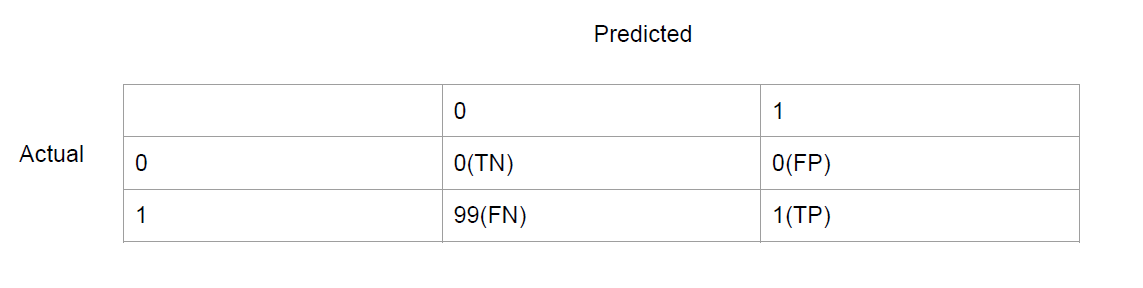

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[11,  2],
       [ 6, 32]])

In [ ]:
confusion_matrix(Y_test, Y_pred).ravel()

array([11,  2,  6, 32])

In [ ]:
 tn, fp, fn, tp= confusion_matrix(Y_test, Y_pred).ravel()

In [ ]:
tn

11

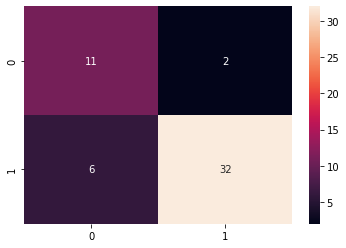

In [ ]:
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot= True)

Find Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

0.8431372549019608

Find the Auc Roc Score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(Y_test, Y_pred)

0.8441295546558705

Find Out number of 0 Classes in Y_test

In [ ]:
sum(Y_test==0)

13

Find Out number of 1 Classes in Y_test

In [ ]:
sum(Y_test==1)

38

Find Out Recall and Precision

In [ ]:
recall= (tp/(tp+fn))

In [ ]:
precision= (tp/(tp+fp))

In [ ]:
recall

0.8421052631578947

In [ ]:
precision

0.9411764705882353

Create the Classification report and Understand each term in it

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(Y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.85      0.73        13\n           1       0.94      0.84      0.89        38\n\n    accuracy                           0.84        51\n   macro avg       0.79      0.84      0.81        51\nweighted avg       0.87      0.84      0.85        51\n'

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.94      0.84      0.89        38

    accuracy                           0.84        51
   macro avg       0.79      0.84      0.81        51
weighted avg       0.87      0.84      0.85        51



In [ ]:
f1_score= (2*precision*recall)/(precision+recall)

In [ ]:
f1_score

0.8888888888888888

In [ ]:
precision_for_class_0= (tn/(tn+fn))

In [ ]:
precision_for_class_0

0.6470588235294118

In [ ]:
recall_for_class_0= (tn/(tn+fp))

In [ ]:
recall_for_class_0

0.8461538461538461

In [ ]:
f1_score_for_class_0= (2*precision_for_class_0*recall_for_class_0)/(precision_for_class_0+recall_for_class_0)

In [ ]:
f1_score_for_class_0

0.7333333333333334

In [ ]:
classifier.predict_proba(X_test)

array([[1.27534265e-01, 8.72465735e-01],
       [6.18552022e-01, 3.81447978e-01],
       [8.39470307e-01, 1.60529693e-01],
       [7.44697452e-02, 9.25530255e-01],
       [5.52662133e-02, 9.44733787e-01],
       [2.19130161e-01, 7.80869839e-01],
       [3.27508637e-03, 9.96724914e-01],
       [9.81405280e-01, 1.85947197e-02],
       [6.65331641e-02, 9.33466836e-01],
       [3.56876725e-01, 6.43123275e-01],
       [1.50982627e-02, 9.84901737e-01],
       [9.75588026e-04, 9.99024412e-01],
       [5.63187770e-01, 4.36812230e-01],
       [9.81001955e-01, 1.89980452e-02],
       [2.45852033e-03, 9.97541480e-01],
       [8.54016222e-01, 1.45983778e-01],
       [6.36062281e-01, 3.63937719e-01],
       [2.02853064e-03, 9.97971469e-01],
       [6.18410789e-01, 3.81589211e-01],
       [8.70975597e-01, 1.29024403e-01],
       [9.41962342e-01, 5.80376580e-02],
       [1.69443576e-01, 8.30556424e-01],
       [5.64749787e-01, 4.35250213e-01],
       [3.83519155e-01, 6.16480845e-01],
       [1.133636

In [ ]:
classifier.predict_proba(X_test)[:, 1] #find the class 1 ie 2nd columns

array([0.87246573, 0.38144798, 0.16052969, 0.92553025, 0.94473379,
       0.78086984, 0.99672491, 0.01859472, 0.93346684, 0.64312328,
       0.98490174, 0.99902441, 0.43681223, 0.01899805, 0.99754148,
       0.14598378, 0.36393772, 0.99797147, 0.38158921, 0.1290244 ,
       0.05803766, 0.83055642, 0.43525021, 0.61648084, 0.98866363,
       0.08632563, 0.8926007 , 0.99966988, 0.99624664, 0.47121305,
       0.92726578, 0.99790346, 0.48263762, 0.98415568, 0.889425  ,
       0.93429662, 0.96065043, 0.99482448, 0.95821563, 0.53194262,
       0.85207234, 0.99619152, 0.45586971, 0.99149614, 0.99811919,
       0.00832948, 0.94382795, 0.22320735, 0.79648037, 0.99904814,
       0.9987707 ])

In [ ]:
classifier.predict_proba(X_test)[:, 1]>=0.7  #setting thresold 0.7

array([ True, False, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True])

In [ ]:
(classifier.predict_proba(X_test)[:, 1]>=0.7).astype(int)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1])

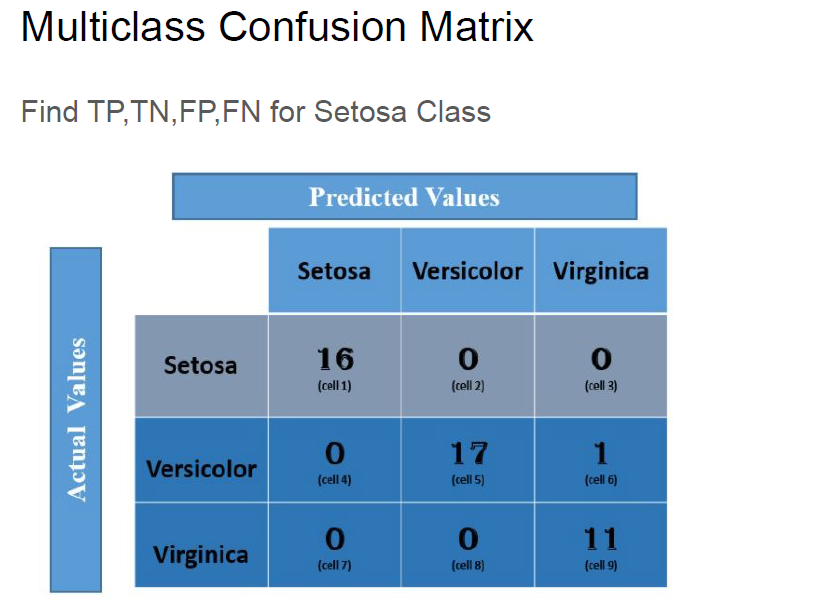

TP- Predection Satos Actual Satosa- 16(c1)    
TN- Prediction Non Satosa Actual non Satosa(true means support predection value)- 17,1,0,11(c5,c6,c8,c11)    
FP- Prediction Satosa actual non satosa- 0,0(c4, c7)        
FN- prediction non satosa actual satosa-0, 0(c2, c3)

#Decision Tree

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X= df.drop(['status', 'salary'], axis =1).values

In [ ]:
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y= df['status'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.25, random_state=42)

In [ ]:
#  Not using Standared Scaler because its not help here in Feature Selection Decision tree not sensitive towards Scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dc= DecisionTreeClassifier() #By default it is gini and classifier Cart algorithm

In [ ]:
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred= dc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[ 6,  7],
       [ 5, 33]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)

0.7647058823529411

Decision Tree very sensitive toward data which are trained on

In [ ]:
Y_pred_train= dc.predict(X_train)   #Checking Accuracy on train dataset

In [ ]:
accuracy_score(Y_train, Y_pred_train)   #accracy 1 shows it is very sensitive on train data ie overfitting

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.82      0.87      0.85        38

    accuracy                           0.76        51
   macro avg       0.69      0.66      0.67        51
weighted avg       0.75      0.76      0.76        51



In [ ]:
from sklearn import tree

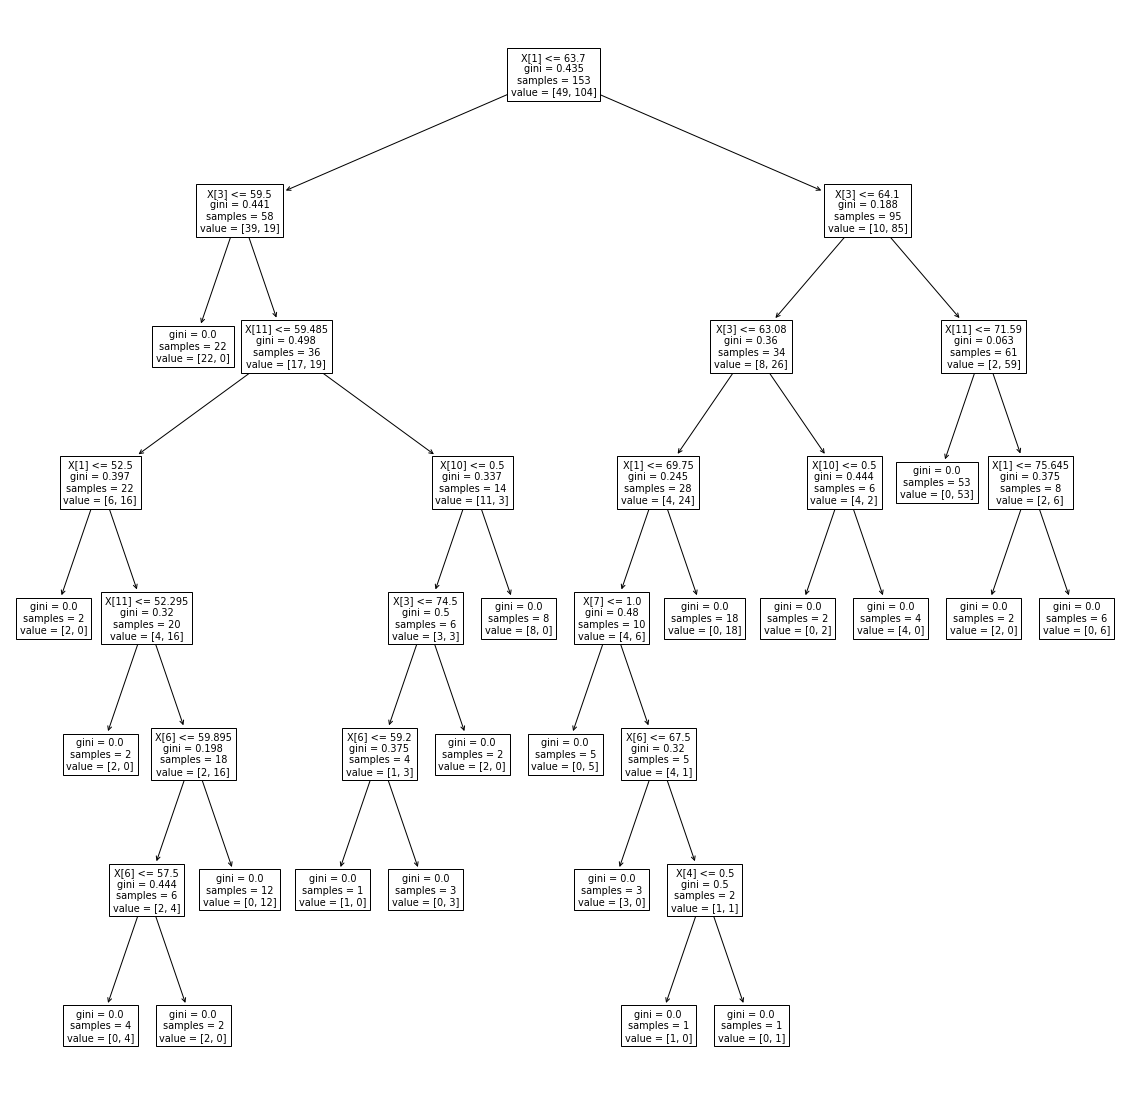

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dc)
plt.show()

In [ ]:
df.columns[:-2]

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [ ]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


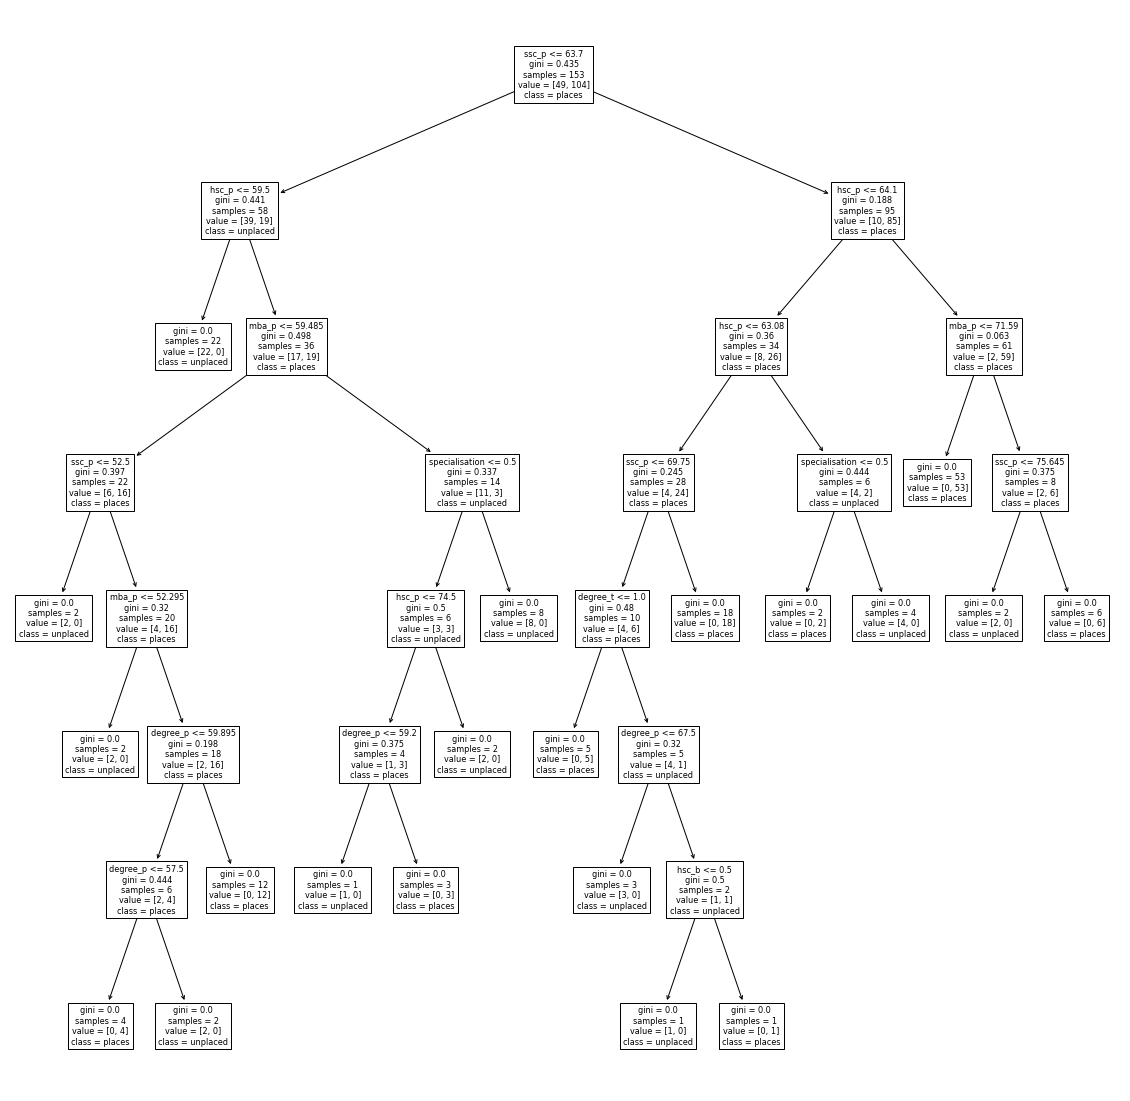

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dc, feature_names= df.columns[:-2], class_names=['unplaced', 'places'])
plt.show()

#Random Forest

In [ ]:
n_estimators= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]  #hyperperimeter-1

In [ ]:
max_features= ['sqrt', 'log2']  #hyperperimeter-2

In [ ]:
np.linspace(0,160, 8, dtype=int)

array([  0,  22,  45,  68,  91, 114, 137, 160])

In [ ]:
[int(x) for x in np.linspace(10, 120, 10)]

[10, 22, 34, 46, 58, 71, 83, 95, 107, 120]

In [ ]:
criterion= ['gini', 'entropy']  #hyperperimeter-3

In [ ]:
min_samples_split= [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]    #hyperperimeter-4

In [ ]:
min_samples_split

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [ ]:
max_depth= np.linspace(10,120, 10, dtype=int)  #hyperperimeter-5  #max. no. of levels allowed in each decisions tree

In [ ]:
random_grid= {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'criterion': criterion,
              'min_samples_split': min_samples_split}

In [ ]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rdsc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, n_iter = 100 , n_jobs = 1)

In [ ]:
rdsc.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         150]})

In [ ]:
rdsc.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 34,
 'criterion': 'entropy'}

In [ ]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [ ]:
rdsc.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 34,
 'criterion': 'entropy'}

In [ ]:
rfbm = RandomForestClassifier(n_estimators = 70, min_samples_split = 4, max_features = 'sqrt',  max_depth = 83, criterion = 'gini')

In [ ]:
rfbm.fit(X_train, Y_train)

RandomForestClassifier(max_depth=83, max_features='sqrt', min_samples_split=4,
                       n_estimators=70)

In [ ]:
Y_pred = rfbm.predict(X_test)

In [ ]:
metrics.accuracy_score(Y_test, Y_pred)

0.8431372549019608

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[ 8,  5],
       [ 3, 35]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.88      0.92      0.90        38

    accuracy                           0.84        51
   macro avg       0.80      0.77      0.78        51
weighted avg       0.84      0.84      0.84        51

